# Real estate price

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Real estate.csv')

In [2]:
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [3]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3


In [4]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis


#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
Y = df['Y house price of unit area']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(289, 4)

In [12]:
pd.DataFrame(X_train)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
7,2013,20.3,287.60250,6
194,2013,15.2,3771.89500,0
19,2012,1.5,23.38284,7
176,2012,13.9,4573.77900,0
367,2012,15.0,1828.31900,2
...,...,...,...,...
71,2013,35.5,640.73910,3
106,2013,17.2,189.51810,8
270,2013,10.8,252.58220,1
348,2012,4.6,259.66070,6


#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

In [40]:
correlation = df.corr()
print(correlation)

                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 lat

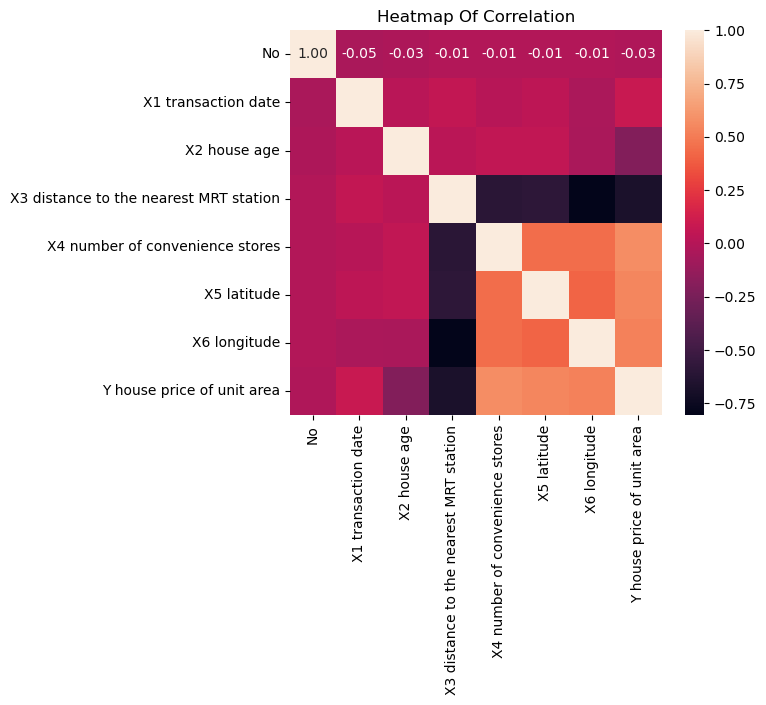

In [48]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title("Heatmap Of Correlation")
plt.show()

#### 
    - X4 number of convenience stores (0.57): A strong positive correlation with Y.
    - X3 distance to the nearest MRT station (-0.67): A strong negative correlation.
    - X2 house age (-0.21): A weak negative correlation.
    - X1 transaction date (0.08): No meaningful correlation with house prices.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_pred = linear_model.predict(X_test)

In [20]:
mse_linear = mean_squared_error(Y_test, Y_pred)

In [21]:
r2_linear = r2_score(Y_test, Y_pred)

In [50]:
print("Mean Squared Error of Linear Regression :", mse_linear)
print("R-squared of Linear Regression:", r2_linear)

Mean Squared Error of Linear Regression : 72.84834417663828
R-squared of Linear Regression: 0.5643696003958076


**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [52]:
poly_model = LinearRegression() 
poly_model.fit(X_train_poly, Y_train)

LinearRegression()

In [26]:
Y_pred_poly = poly_model.predict(X_test_poly) 

In [27]:
mse_poly = mean_squared_error(Y_test, Y_pred_poly) 

In [28]:
r2_poly = r2_score(Y_test, Y_pred_poly)

In [54]:
print("Mean Squared Error of Polynomial Regression:", mse_poly)
print("R-squared of Polynomial Regression:", r2_poly)


Mean Squared Error of Polynomial Regression: 63.78942218552089
R-squared of Polynomial Regression: 0.6185416183267138



#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.



In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
Y_pred_linear = linear_model.predict(X_test)              # Linear Regression
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

In [32]:
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("R-squared (R²):", r2_linear)

Linear Regression:
Mean Squared Error (MSE): 72.84834417663828
R-squared (R²): 0.5643696003958076


In [33]:
Y_pred_poly = poly_model.predict(X_test_poly)                # Polynomial Regressio
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)

In [34]:
print("\nPolynomial Regression:")
print(f"Degree: {degree}")
print("Mean Squared Error (MSE):", mse_poly)
print("R-squared (R²):", r2_poly)


Polynomial Regression:
Degree: 3
Mean Squared Error (MSE): 63.78942218552089
R-squared (R²): 0.6185416183267138


In [35]:
print("\nModel Comparison:")                                 # Comparison
print("Linear Regression - MSE:", mse_linear, "| R²:", r2_linear)
print(f"Polynomial Regression (Degree {degree}) - MSE:", mse_poly, "| R²:", r2_poly)



Model Comparison:
Linear Regression - MSE: 72.84834417663828 | R²: 0.5643696003958076
Polynomial Regression (Degree 3) - MSE: 63.78942218552089 | R²: 0.6185416183267138



#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.

In [36]:
import matplotlib.pyplot as plt

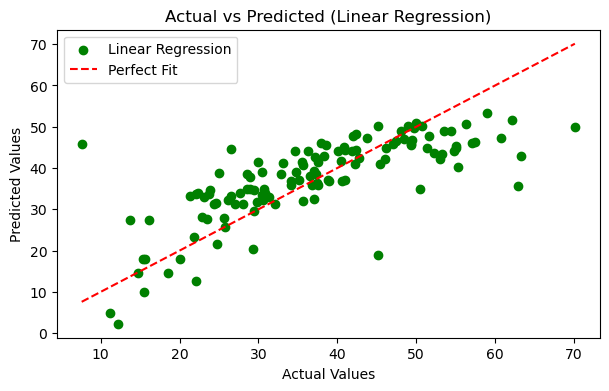

In [59]:
                                                # Linear Regression
plt.figure(figsize=(7, 4))
plt.scatter(Y_test, Y_pred_linear, color='green', label='Linear Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()

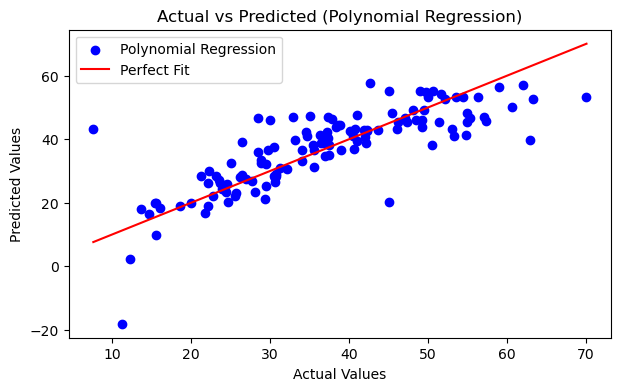

In [61]:
                                        # Polynomial Regression
plt.figure(figsize=(7, 4))
plt.scatter(Y_test, Y_pred_poly, color='blue', label='Polynomial Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.legend()
plt.show()